In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("diabetes.csv")

In [45]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.apply(lambda x: x.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Checking if dataset is balanced or not
outcome_true = len(df.loc[df['Outcome']==1])
outcome_true

268

In [7]:
outcome_false = len(df.loc[df['Outcome']==0])
outcome_false

500

In [4]:
x = df.iloc[:,:-1].values
y = df.iloc[:,8].values


#### Finding out correlation

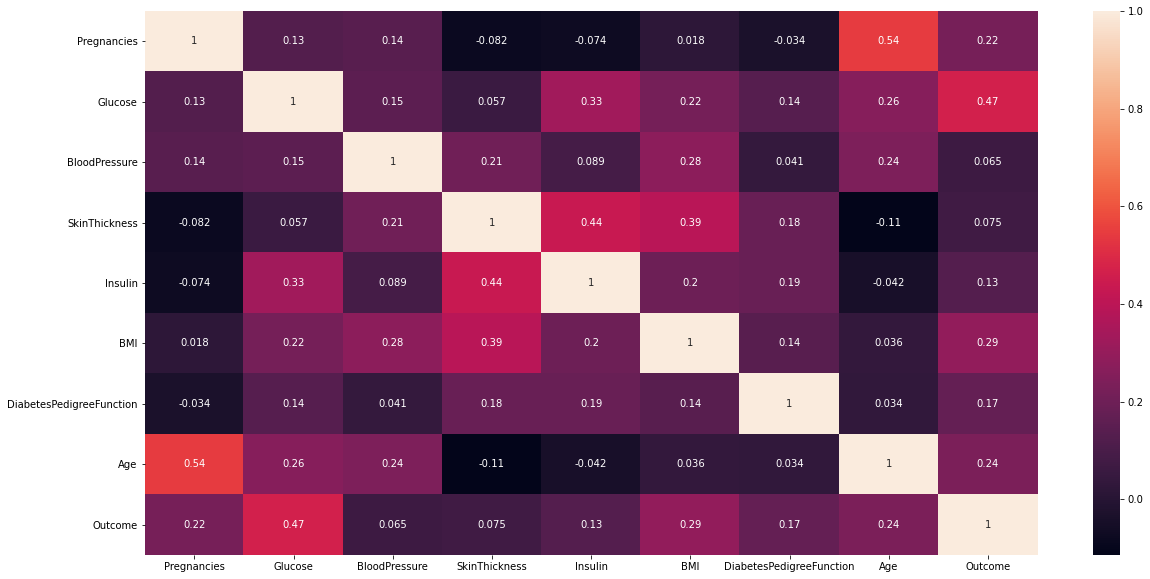

In [9]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True)

In [10]:
corrmat

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
df[top_corr_features].corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


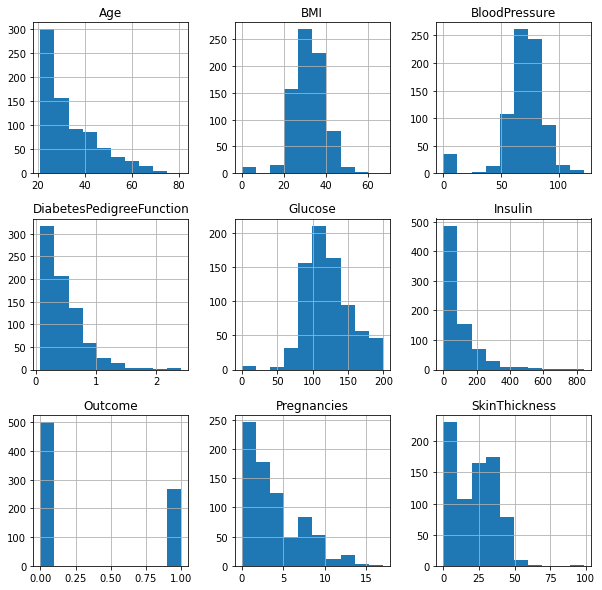

In [14]:
df.hist(figsize=(10,10))
plt.show()

#### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit(x).transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

#### Choosing our dependent and independent variables

In [19]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

#### Backward elimination

In [87]:
x_b = np.append(np.ones(shape=(768,1)).astype(int),values=x,axis = 1)

In [88]:
x_b

array([[  1.   ,   6.   , 148.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,   1.   ,  85.   , ...,  26.6  ,   0.351,  31.   ],
       [  1.   ,   8.   , 183.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  1.   ,   5.   , 121.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   ,   1.   , 126.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,   1.   ,  93.   , ...,  30.4  ,   0.315,  23.   ]])

#### By Backward elimination, eliminating the variables with less P value. Threshold value = 0.06

In [89]:
x_opt = x_b[:,:-1] #fitting all the columns

#OLS = Ordinary least squares.

In [90]:
sl=0.05
def backwardElimination(x,sl):
    numvar = len(x[0])
    for i in range(0,numvar):
        regressor_OLS = sm.OLS(endog=y,exog=x).fit()
        maxvar = max(regressor_OLS.pvalues).astype(float)
        if maxvar > sl:
            for j in range(0,numvar-i):
                if (regressor_OLS.pvalues[j].astype(float) == maxvar):
                    x=np.delete(x,j,1)
    regressor_OLS.summary()
    return x
x_modeled = backwardElimination(x_opt,sl)

In [91]:
x_modeled

array([[  1.   ,   6.   , 148.   ,  72.   ,  33.6  ,   0.627],
       [  1.   ,   1.   ,  85.   ,  66.   ,  26.6  ,   0.351],
       [  1.   ,   8.   , 183.   ,  64.   ,  23.3  ,   0.672],
       ...,
       [  1.   ,   5.   , 121.   ,  72.   ,  26.2  ,   0.245],
       [  1.   ,   1.   , 126.   ,  60.   ,  30.1  ,   0.349],
       [  1.   ,   1.   ,  93.   ,  70.   ,  30.4  ,   0.315]])

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#### DECISION TREE REGRESSOR

In [123]:
regressor1 = DecisionTreeRegressor(random_state=0)
regressor1.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [124]:
y1_pred = regressor1.predict(x_test)
y1_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [125]:
#Checking Accuracy
print('Accuracy score: ',metrics.accuracy_score(y_test,y1_pred))

Accuracy score:  0.7857142857142857


#### LOGISTIC REGRESSION

In [126]:
regressor2 = LogisticRegression(C=0.01,solver='liblinear')
regressor2.fit(x_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y2_pred = regressor2.predict(x_test)
y2_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [128]:
y_proba = regressor2.predict_proba(x_test)
y_proba

array([[0.20097591, 0.79902409],
       [0.6854997 , 0.3145003 ],
       [0.76182492, 0.23817508],
       [0.39101488, 0.60898512],
       [0.72751037, 0.27248963],
       [0.82669003, 0.17330997],
       [0.34593103, 0.65406897],
       [0.26167924, 0.73832076],
       [0.5186449 , 0.4813551 ],
       [0.50973241, 0.49026759],
       [0.43293046, 0.56706954],
       [0.1553272 , 0.8446728 ],
       [0.57328752, 0.42671248],
       [0.66618987, 0.33381013],
       [0.70079031, 0.29920969],
       [0.69308205, 0.30691795],
       [0.28135464, 0.71864536],
       [0.86317967, 0.13682033],
       [0.49350354, 0.50649646],
       [0.63315254, 0.36684746],
       [0.42309293, 0.57690707],
       [0.56167541, 0.43832459],
       [0.70703377, 0.29296623],
       [0.76475333, 0.23524667],
       [0.79629571, 0.20370429],
       [0.60568707, 0.39431293],
       [0.81062546, 0.18937454],
       [0.21773309, 0.78226691],
       [0.74498636, 0.25501364],
       [0.71011218, 0.28988782],
       [0.

In [129]:
from sklearn.metrics import jaccard_similarity_score
print("Jaccard Score: ",jaccard_similarity_score(y_test,y2_pred))

Jaccard Score:  0.7922077922077922


c:\users\vedant\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:660: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  warnings.warn('jaccard_similarity_score has been deprecated and replaced '


In [130]:
from sklearn import metrics
print("Accuracy score: ",metrics.accuracy_score(y_test,y2_pred))

Accuracy score:  0.7922077922077922


**NAIVE BAYES**

In [14]:
nb_clf = GaussianNB()

In [15]:
nb_clf.fit(x_train,y_train)

GaussianNB()

In [16]:
y_pred1 = nb_clf.predict(x_test)

In [17]:
print("GaussianNB Accuracy: ",metrics.accuracy_score(y_test,y_pred1))

GaussianNB Accuracy:  0.7922077922077922


**RandomForestCLassifier**

In [18]:
rf_clf = RandomForestClassifier(random_state=0)

In [19]:
n_estimators_rf = [100,200,500,700,900]
max_depth_rf = [3,5,7,9,10,12]
criterion=['gini','entropy']
min_samples_split_rf = [2,3,4,5]
max_features_rf = ['auto','sqrt','log2']

In [20]:
parameters_rf = {
    'n_estimators':n_estimators_rf,
    'max_depth':max_depth_rf,
    'max_features':max_features_rf,
    'criterion':criterion,
    'min_samples_split':min_samples_split_rf
}

In [21]:
rf_clf_r = RandomizedSearchCV(estimator=rf_clf,param_distributions=parameters_rf,cv=10,n_iter=20,n_jobs=-1,scoring='accuracy',random_state=0)

In [22]:
rf_clf_r.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 500, 700,
                                                         900]},
                   random_state=0, scoring='accuracy')

In [23]:
rf_clf_r.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'entropy'}

In [25]:
rf_model = RandomForestClassifier(n_estimators=500,min_samples_split=5,max_features='sqrt',max_depth=7,criterion='entropy')

In [26]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_split=5, n_estimators=500)

In [27]:
y_pred2 = rf_model.predict(x_test)

In [28]:
print("Random Forest Accuracy: ",metrics.accuracy_score(y_test,y_pred2))

Random Forest Accuracy:  0.8376623376623377


**XGBOOST**

In [29]:
xgb_clf = xgb.XGBClassifier()

In [30]:
max_depth = [3,4,5,7,9,12]
learning_rate=[0.001,0.01,0.1,0.2,0.5]
booster=['gbtree','gblinear','dart']
gamma=[0,0.25,0.5,1.0]
subsample = [0.5,0.6,0.7,0.9,1.0]
colsample_bytree = [0.2,0.3,0.4,0.5,0.7]
colsample_bylevel = [0.3,0.4,0.5,0.6,0.7]


In [31]:
parameters_xgb = {
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'booster':booster,
    'gamma':gamma,
    'subsample':subsample,
    'colsample_bytree':colsample_bytree,
    'colsample_bylevel':colsample_bylevel
}

In [32]:
xgb_clf_r = RandomizedSearchCV(estimator=xgb_clf,param_distributions=parameters_xgb,cv=10,n_iter=10,n_jobs=-1,scoring='accuracy',random_state=0)

In [33]:
xgb_clf_r.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           validate_parameters=False,
                                           verbosity=None),
                   n_jobs=-1,
                   pa

In [34]:
xgb_clf_r.best_params_

{'subsample': 0.9,
 'max_depth': 3,
 'learning_rate': 0.2,
 'gamma': 0.25,
 'colsample_bytree': 0.2,
 'colsample_bylevel': 0.5,
 'booster': 'gblinear'}

In [35]:
xgb_model = xgb.XGBClassifier(max_depth=3,learning_rate=0.2,gamma=0.25,booster='gblinear',subsample=0.9,colsample_bytree=0.2,colsample_bylevel=0.5)

In [36]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=0.5,
              colsample_bynode=None, colsample_bytree=0.2, gamma=0.25,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=3,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=0.9, tree_method=None, validate_parameters=False,
              verbosity=None)

In [37]:
y_pred3 = xgb_model.predict(x_test)

In [38]:
print("XGBOOST Accuracy: ",metrics.accuracy_score(y_test,y_pred3))

XGBOOST Accuracy:  0.8246753246753247


Hence the best model is RandomForest Classifier

In [39]:
import pickle
with open("diabetes_model.pkl","wb") as f:
    pickle.dump(rf_model,f)

In [33]:
x_test[0].shape

(8,)

In [11]:
import pickle
model = pickle.load(open("diabetes_model.pkl","rb"))
pred = model.predict([x_test[0]])
pred

array([1], dtype=int64)

In [12]:
y_test[0]

1

In [40]:
lst = np.array([6,148,72,35,0,33.6,0.675,50])
lst = np.reshape(lst,(-1,1))
lst = sc.fit_transform(lst)
lst = np.reshape(lst,(8,))
print(lst)


[-0.80429093  2.26920833  0.6242369  -0.17660446 -0.93415709 -0.20690656
 -0.91954715  0.14806096]


In [43]:
pred =model.predict([lst])

In [44]:
pred[0]

1